In [1]:
import ect
from ect.optimizers import ECTAngularFNF
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/10
ect_offset = radius/5

n_knots = 20

In [2]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return x/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [3]:
opt = ECTAngularFNF(
    image_path = "../sample_imgs/white.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y),
)

result = opt.optim()
# result = opt.optim(method = "Nelder-Mead")
# solution = result['x'][0]


Current loss=-15.265
Current loss=-15.281
Current loss=-15.288
Current loss=-15.295
Current loss=-15.297
Current loss=-15.297
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298
Current loss=-15.298


In [4]:
result

      fun: -15.29769602862907
 hess_inv: array([[ 9.97660164e-02, -1.08187228e-02, -5.80990125e-02,
         3.17404012e-02,  8.53229383e-02,  7.32529547e-02,
         8.73109629e-02,  5.09483581e-02,  6.82016678e-02,
         7.87488279e-02,  5.81410829e-02,  7.07951179e-02,
         7.96576780e-02,  6.37721283e-02,  7.98633911e-02,
         7.95192928e-02,  3.13066466e-02, -2.66489266e-02,
        -9.12809333e-03,  6.65284669e-02],
       [-1.08187228e-02,  2.18133910e+00,  2.16918656e-01,
        -7.77702691e-02, -2.78836420e-02, -3.02010813e-02,
         2.19372000e-02,  2.55256427e-02,  5.17790237e-02,
        -1.89558286e-02, -3.21262477e-02,  8.77837119e-03,
        -7.23233580e-03,  1.25581730e-02, -7.40843414e-03,
         1.47432650e-02,  3.03292817e-02, -2.93245071e-01,
        -1.05676181e+00,  4.73401935e-03],
       [-5.80990125e-02,  2.16918656e-01,  5.32677988e+00,
         4.28178973e-01, -9.64752748e-02, -1.04883830e-01,
        -1.16816986e-01,  6.82015942e-02, -1.58

opt.loss(solution)=-15.29769602862907


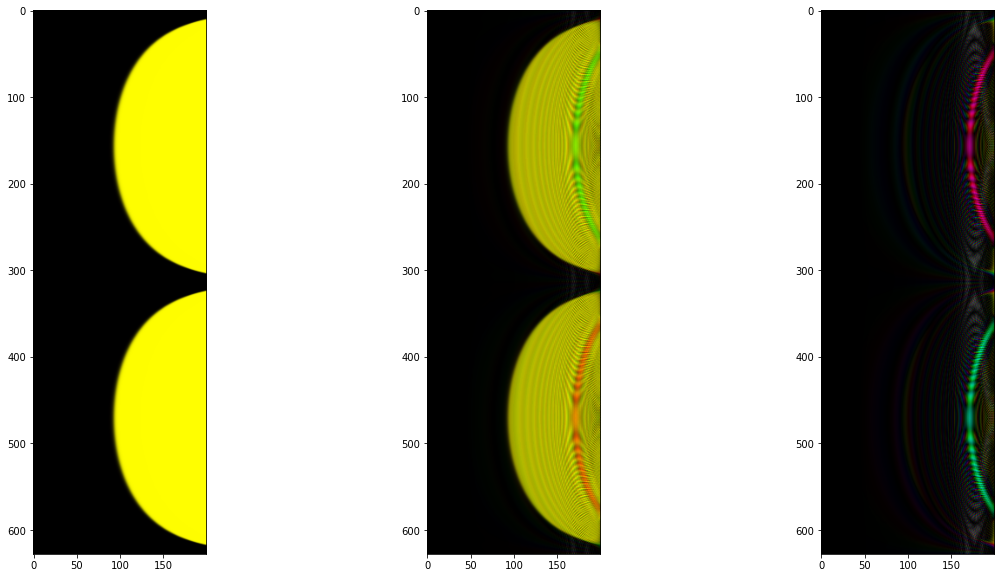

In [5]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [6]:
res = opt.inv

knots_angle = solution
# knots_space = solution[n_knots:]

ang = ect.freqnorm_phi(res.shape[:2], knots_angle)
# snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_angle=}")

knots_angle=array([1.03192427, 0.87515323, 0.96026164, 1.02587701, 1.07139708,
       1.02643274, 1.03186914, 0.99673798, 0.97737776, 0.98680375,
       0.98521292, 0.98006127, 0.99413288, 1.0338536 , 1.02329079,
       1.07317791, 1.03490971, 1.01768517, 0.81079934, 1.06301781])


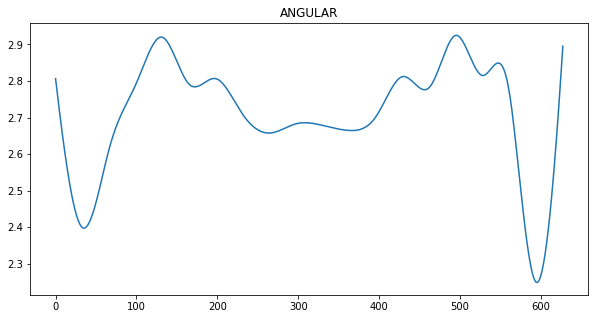

In [7]:
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
plt.title("ANGULAR")
plt.plot(ang[:,10])

# plt.subplot(1, 2, 2)
# plt.title("SNF")
# plt.plot(snf[0,:])

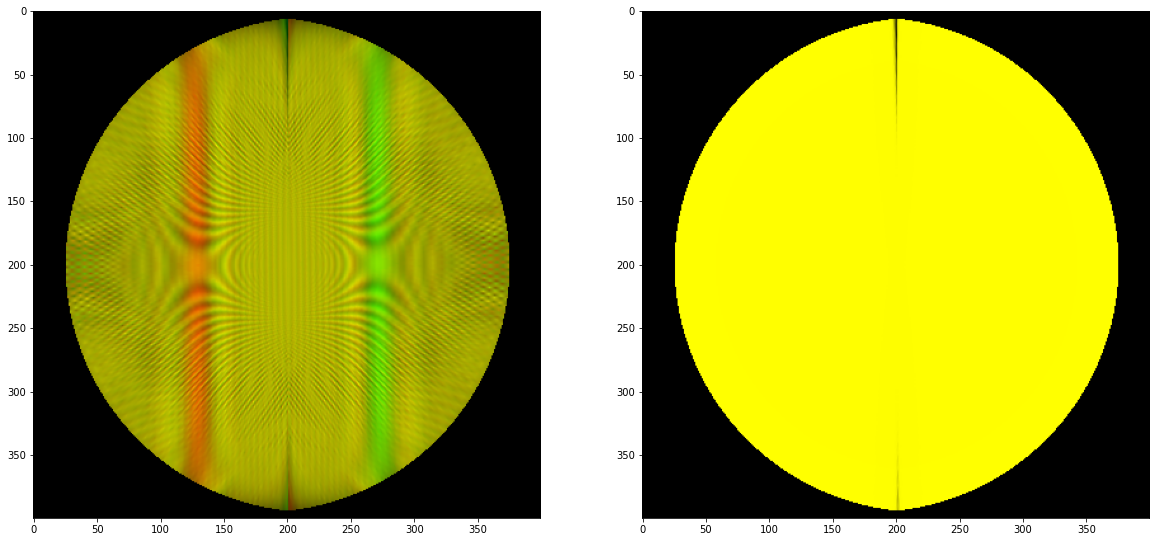

In [8]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)